In [ ]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
import zipfile as zp
import os
import pandas as pd
import torch
from tqdm.notebook import tqdm

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [ ]:
# while True:pass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Labeling

In [ ]:
# Faces_Dir = '/content/drive/MyDrive/Projekt_Zespołowy/crop_part1' #cropped
Faces_Dir = '/content/drive/MyDrive/Projekt_Zespołowy/UTKFace' #whole

In [ ]:
img_paths =[] #for multiple pictures
age_labels = []
gender_labels =[]

In [ ]:
for filename in tqdm(os.listdir(Faces_Dir)):
  img_path = os.path.join(Faces_Dir, filename)
  tmp = filename.split('_')
  age = int(tmp[0])
  gender = int(tmp[1])

  age_labels.append(age)
  gender_labels.append(gender)
  img_paths.append(img_path)

  0%|          | 0/23748 [00:00<?, ?it/s]

In [ ]:
data_frame = pd.DataFrame()
data_frame['image'], data_frame['age'], data_frame['gender']= img_paths, age_labels, gender_labels

In [ ]:
data_frame.head

<bound method NDFrame.head of                                                    image  age  gender
0      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       0
1      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...    6       0
2      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   85       1
3      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       1
4      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       1
...                                                  ...  ...     ...
23743  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       1
23744  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   12       0
23745  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   10       1
23746  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       0
23747  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       0

[23748 rows x 3 columns]>

In [ ]:
from torch.utils import data
#maping gender labels
gender_dictionary = {0:'Male', 1:'Female'}

# Data INFO :)

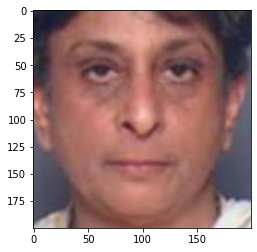

In [ ]:
from PIL import Image
ex_image = Image.open(data_frame['image'][6840])
plt.imshow(ex_image)

Cell for testing:

(200, 200)

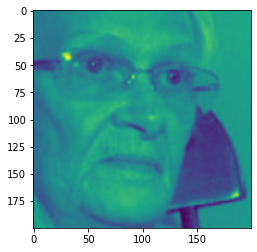

In [ ]:
#image importing using torchvision

#reading images as greyscale torch tensor
ex_im = torchvision.io.read_image(data_frame['image'][1000],
                                  torchvision.io.ImageReadMode.GRAY)
ex_im.reshape(200,200).shape
im = np.array(ex_im)
im = im.reshape(200,200)
plt.imshow(im)

ex1_im = Image.open((data_frame['image'][1000]))
ex1_im = np.array(ex1_im).mean(axis=2)
ex1_im.shape

# Sets creation

In [ ]:
def images_featuring(images):
  features = []
  for num in tqdm(range(images.size)):
    img = torchvision.io.read_image(images[num],
                                    torchvision.io.ImageReadMode.GRAY)
    img = img.reshape((200, 200), 1)
    img = img.numpy()
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 200, 200, 1)

  return features

In [ ]:
X = images_featuring(data_frame['image'])

  0%|          | 0/23748 [00:00<?, ?it/s]

In [ ]:
#normalizing pix. to 0-1
X = X/255.0

In [ ]:
# change of view
X = torch.Tensor(X).to(device).view(-1,200,200)

Gdy mamy pobrane X jako np.array:

In [ ]:
#selecting device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
## wczytanie tensora z google drive dla UTKFace
# torch.save(X, 'X2.pt')
# X = torch.load('/content/drive/MyDrive/Projekt_Zespołowy/X2.pt')
# X.size()
# X = np.array(X.cpu())

In [ ]:
X = np.load("/content/drive/MyDrive/Projekt_Zespołowy/X_np.npy")

In [ ]:
# Przekształcenie np.array do tensora
X = torch.Tensor(X)
X[0]

tensor([[0.8588, 0.8588, 0.8588,  ..., 0.6196, 0.6196, 0.6275],
        [0.8588, 0.8588, 0.8588,  ..., 0.6157, 0.6157, 0.6157],
        [0.8588, 0.8588, 0.8588,  ..., 0.6157, 0.6078, 0.6078],
        ...,
        [0.4902, 0.4667, 0.4392,  ..., 0.7529, 0.7882, 0.7961],
        [0.4863, 0.4627, 0.4314,  ..., 0.7020, 0.7725, 0.8039],
        [0.4784, 0.4588, 0.4275,  ..., 0.6510, 0.7490, 0.7961]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dtype('int64')

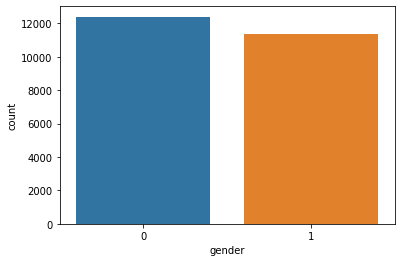

In [ ]:
y_gender = np.array(data_frame['gender'])

y_age = np.array(data_frame['age'])

import seaborn as sns
sns.countplot(data_frame['gender'])
y_gender.dtype

# **Gender Estimation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_gender,
                                                    test_size = 0.2,
                                                    random_state = 4)
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
y_train_hot = []

for i in y_train:
  y_train_hot.append(np.eye(2)[i])

y_train_hot[:10]

[array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.])]

In [ ]:
# model class for gender prediction
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 3, 1)
        self.conv2 = nn.Conv2d(20, 40, 3, 1)
        self.conv3 = nn.Conv2d(40, 50, 3, 1)
        self.fc1 = nn.Linear(23*23*50, 600) #(((((200-2)/2)-2))/2)-2))/2) = 23,..
        self.fc2 = nn.Linear(600, 100)
        self.fc3 = nn.Linear(100,2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 23*23*50)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.sigmoid(X)
        #softmax(X, dim=1)

In [ ]:
model = ConvolutionalNetwork().to(device)
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(40, 50, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=26450, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## *Train* and *Test*

In [ ]:
def get_accuracy(model, X_test, y_test):
  correct = 0
  total = 0
  with torch.no_grad():
      for i in range(len(X_test)):
          real_class = y_test[i]
          net_out = model(X_test[i].to(device).view(-1, 1, 200, 200))[0]  # returns a list, 
          predicted_class = torch.argmax(net_out)

          if predicted_class == real_class:
              correct += 1
          total += 1
  return round(correct/total, 3)

In [ ]:
BATCH_SIZE = 100
EPOCHS = 40
MODELPATH = "/content/drive/MyDrive/Projekt_Zespołowy/model.pth"

y_train_hot = torch.Tensor(y_train_hot)

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X_train), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_X = X_train[i:i+BATCH_SIZE].view(-1, 1, 200, 200).to(device)
        batch_y = y_train_hot[i:i+BATCH_SIZE].to(device)

        model.zero_grad()

        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    acc = get_accuracy(model, X_test, y_test)
    print(f"Epoch: {epoch+1}. Loss: {loss}. Accuracy: {acc}")
    
    #saving model each epoch
    device = torch.device("cuda")
    model.to(device)
    torch.save(model.state_dict(), MODELPATH)

# **Age Estimation**

In [ ]:
age_dictionary = {0:'(8-15>', 1:'(15-20>', 2:'(20-30>', 3:'(30-40>', 4:'(40-55>', 5:'(55-65>', 6:'(65-..'}

In [ ]:
from math import tan
#Setting age ranges
# 8-15, 15-20, 20-30, 30-40, 40-55, 55-65, 65-..
y_age_range = y_age
count = 0

count_inx_0 = 0
count_inx_1 = 0
count_inx_2 = 0
count_inx_3 = 0
count_inx_4 = 0
count_inx_5 = 0
count_inx_6 = 0

limit = 900

for idx, age in np.ndenumerate(y_age_range):
  if age <= 8:
    y_age_range[idx] = -1
    count += 1

  elif age > 8 and age <= 15:
    count_inx_0 += 1
    if count_inx_0 < limit:
      y_age_range[idx] = 0
    else:
      y_age_range[idx] = -1

  elif age > 15 and age <= 20:
    count_inx_1 += 1
    if count_inx_1 < limit:
      y_age_range[idx] = 1
    else:
      y_age_range[idx] = -1

  elif age > 20 and age <= 30:
    count_inx_2 += 1
    if count_inx_2 < limit:
      y_age_range[idx] = 2
    else:
      y_age_range[idx] = -1

  elif age > 30 and age <= 40:
    count_inx_3 += 1
    if count_inx_3 < limit:
      y_age_range[idx] = 3
    else:
      y_age_range[idx] = -1

  elif age > 40 and age <= 55:
    count_inx_4 += 1
    if count_inx_4 < limit:
      y_age_range[idx] = 4
    else:
      y_age_range[idx] = -1

  elif age > 55 and age <= 65:
    count_inx_5 += 1
    if count_inx_5 < limit:
      y_age_range[idx] = 5
    else:
      y_age_range[idx] = -1

  elif age > 65:
    count_inx_6 += 1
    if count_inx_6 < limit:
      y_age_range[idx] = 6
    else:
      y_age_range[idx] = -1

count

2904

In [ ]:
#usuwanie wieku z indx = -1 ->(0-8)
y_age_range_ = y_age_range
indexes_out = []
a = 0
for idx, num in np.ndenumerate(y_age_range_):
  if num == -1:
    indexes_out.append(idx)
len(indexes_out)

17455

In [ ]:
#usuwanie indeksów z y
y_age_no_out = np.delete(y_age_range_, indexes_out)

In [ ]:
#usuwanie tych samych indeksów z x
X_ = X
X_no_out = np.delete(X_, indexes_out, 0)
X_no_out.shape

torch.Size([6293, 200, 200])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


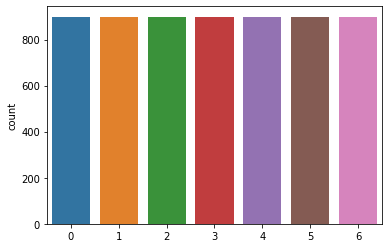

In [ ]:
import seaborn as sns
sns.countplot(y_age_no_out)

In [ ]:
# Zwolnienie pamięci zaalokowej dla X
import gc
del(X)
gc.collect()

2179

In [ ]:
Xage_train, Xage_test, yage_train, yage_test = train_test_split(X_no_out, y_age_no_out,
                                                    test_size = 0.2,
                                                    random_state = 4)
yage_train[:10]

array([5, 3, 5, 6, 2, 5, 2, 5, 2, 2])

In [ ]:
# Zwolnienie pamięci zaalokowej dla X_no_out
import gc
del(X_no_out)
gc.collect()

219

In [ ]:
#one hot encoding for age groups
yage_train_hot = []

for i in yage_train:
  yage_train_hot.append(np.eye(7)[i])

yage_train_hot[:10]

[array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.])]

In [ ]:
# model class for age prediction
class ConvolutionalNetwork_age(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,  50, 3, 1)
        self.conv2 = nn.Conv2d(50, 100, 3, 1)
        self.conv3 = nn.Conv2d(100, 150, 3, 1)
        self.conv4 = nn.Conv2d(150, 200, 3, 1)
        self.fc1 = nn.Linear(10*10*200, 3000) #(((((200-2)/2)-2))/2)-2))/2) = 23,.. (4->10)
        self.fc2 = nn.Linear(3000, 300)
        self.fc3 = nn.Linear(300,7) #7-liczba klas wieków

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 10*10*200)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.softmax(X, dim=1)


In [ ]:
model_age = ConvolutionalNetwork_age()#.to(device)
model_age

ConvolutionalNetwork_age(
  (conv1): Conv2d(1, 50, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=20000, out_features=3000, bias=True)
  (fc2): Linear(in_features=3000, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=7, bias=True)
)

In [ ]:
loss_function_age = nn.CrossEntropyLoss()
optimizer_age = torch.optim.Adam(model_age.parameters(), lr=0.001)

## Train and test

In [ ]:
BATCH_SIZE = 80
EPOCHS = 200
MODELPATHAGE = "/content/drive/MyDrive/Projekt_Zespołowy/model_age.pth"

targets = []
preds = []

best_accuracy = 0.0
yage_train_hot = torch.Tensor(yage_train_hot)

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(Xage_train), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_Xage = Xage_train[i:i+BATCH_SIZE].view(-1, 1, 200, 200).to(device)
        batch_yage = yage_train_hot[i:i+BATCH_SIZE].to(device)
        model_age.zero_grad()

        outputs_age = model_age(batch_Xage)
        loss = loss_function_age(outputs_age, batch_yage)
        loss.backward()
        optimizer_age.step()    # Does the update
    
    acc = get_accuracy(model_age, Xage_test, yage_test)
    print(f"Epoch: {epoch+1}. Loss: {loss}. Accuracy: {acc}")

    if acc > best_accuracy:
      best_accuracy = acc
      model_age.to(device)
      torch.save(model_age.state_dict(), MODELPATHAGE)

    print(best_accuracy)

# **Applying model to single objects**

In [ ]:
def predict(model, image):
    with torch.no_grad():
        net_out = model(image.to(device).view(-1, 1, 200, 200))[0]  # returns a list,
        predicted_class = torch.argmax(net_out)
        print('net_out: ', net_out)
    return predicted_class.item()

In [ ]:
# model_gender = ConvolutionalNetwork().cuda()
model_age = ConvolutionalNetwork_age().cuda()

# model_gender.load_state_dict(torch.load('/content/drive/MyDrive/Projekt_Zespołowy/model.pth'))
model_age.load_state_dict(torch.load('/content/drive/MyDrive/Projekt_Zespołowy/model_age.pth'))

<All keys matched successfully>

[array(4), array(6), array(3), array(3), array(1), array(5), array(6), array(3), array(5), array(3)]


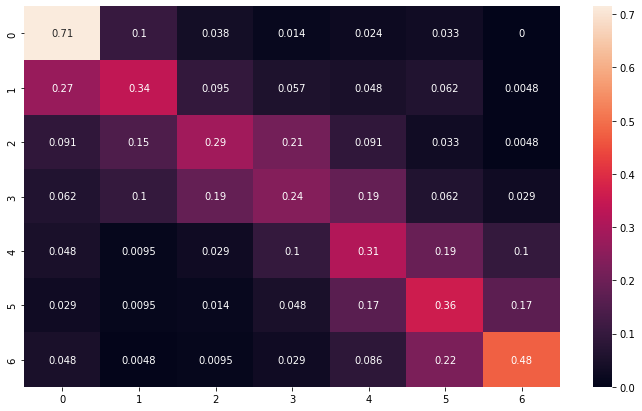

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
with torch.no_grad():
  for idx, age in np.ndenumerate(yage_test):
        net_out = model_age(Xage_test[idx].to(device).view(-1, 1, 200, 200))[0]  # returns a list,
        predicted_class = torch.argmax(net_out).cpu().data.numpy()
        # print(predicted_class)
        y_pred.append(predicted_class) # Save Prediction
        
        labels = yage_test[idx]
        y_true.append(labels) # Save Truth

# constant for classes
classes = ('0', '1', '2', '3', '4',
        '5', '6')
print(y_pred[:10])
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *6, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
def Example(index):
  predicted_gender = predict(model_gender, X[index])
  predicted_age_range = predict(model_age, X[index])
  plt.imshow(X[index], cmap="Greys_r")
  print(f'Predicted gender: {gender_dictionary[predicted_gender]}, real gender:\
   {gender_dictionary[gender_labels[index]]}')
  print(f'Predicted age: {age_dictionary[predicted_age_range]},\
   real age: {age_labels[index]}')

net_out:  tensor([1.0000e+00, 1.7350e-09], device='cuda:0')
net_out:  tensor([2.5431e-35, 6.7688e-31, 4.6186e-32, 6.8261e-30, 2.8321e-01, 7.1679e-01,
        2.9543e-19], device='cuda:0')
Predicted gender: Male, real gender:   Male
Predicted age: (55-65>,   real age: 54


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


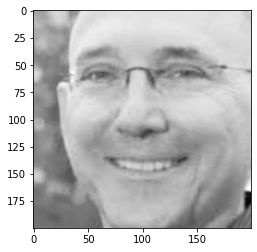

In [ ]:
Example(2211)

net_out:  tensor([1.0000e+00, 8.6043e-25], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        5.6899e-34], device='cuda:0')
Predicted gender: Male, real gender:   Male
Predicted age: (55-65>,   real age: 65


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


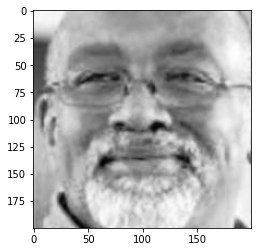

In [ ]:
Example(0)

net_out:  tensor([2.7910e-04, 9.9980e-01], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2071e-14,
        1.0000e+00], device='cuda:0')
Predicted gender: Female, real gender:   Female
Predicted age: (65-..,   real age: 85


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


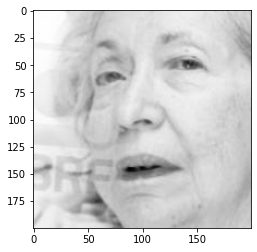

In [ ]:
Example(2)

net_out:  tensor([2.7775e-07, 1.0000e+00], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 4.7566e-39, 5.1848e-44, 2.1580e-43, 1.0000e+00,
        1.2588e-36], device='cuda:0')
Predicted gender: Female, real gender:   Female
Predicted age: (55-65>,   real age: 56


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


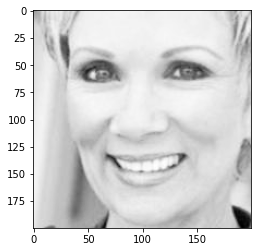

In [ ]:
Example(3333)